## 1) Problem statement.

**Data:** Phishing Data

**Domain:** Cyber-Security

**Problem statement :**
- Phishing is a type of fraud in which an attacker impersonates a reputable company or person in order to get sensitive information such as login credentials or account information via email or other communication channels. Phishing is popular among attackers because it is easier to persuade someone to click a malicious link that appears to be authentic than it is to break through a computer's protection measures. The main goal is to predict whether the domains are real or malicious.

- This is a Classification Problem so let's understand the same using following example.


|True class | Positive | Negative | |
| ----------- | ----------- |   |  |
|<b>Predicted class</b>||| |
| Positive      |   -       | cost_1  |    |
| Negative   | cost_2        |  | |


Cost 1 = 10 and Cost 2 = 500

- The total cost of a prediction model the sum of `Cost_1` multiplied by the number of Instances with type 1 failure and `Cost_2` with the number of instances with type 2 failure, resulting in a `Total_cost`. In this case `Cost_1` refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while `Cost_2` refer to the cost of missing a faulty truck, which may cause a breakdown. 
- `Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.`

- From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to **reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.**

## Challenges and other objectives

- No low-latency requirement.
- Interpretability is not important.
- misclassification leads the chances of Phishing.

## 2) Import required libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer


warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset_full.csv to dataset_full.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset_full.csv']))
print(df)

       qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0                3               0                  0              1   
1                5               0                  1              3   
2                2               0                  0              1   
3                4               0                  2              5   
4                2               0                  0              0   
...            ...             ...                ...            ...   
88642            3               1                  0              0   
88643            2               0                  0              0   
88644            2               1                  0              5   
88645            2               0                  0              1   
88646            2               0                  0              0   

       qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                         0              0           0          

### Read Data

In [6]:
# Load csv file
# df = pd.read_csv('dataset_full.csv', na_values="na")

In [7]:
# check rows and columns of the dataset
df.shape

(88647, 112)

In [8]:
# check columns name
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [9]:
# Column wise unique values:
for col in df:
    print(f'{col}: {df[col].unique()}')

qty_dot_url: [ 3  5  2  4  1  6  9  7  8 10 12 15 11 14 18 16 20 13 17 23 24 19 22]
qty_hyphen_url: [ 0  1  2  4  3  6  5  8  7 12 10  9 19 11 14 17 15 18 13 20 26 25 35 23
 34 24 21 31 16 27]
qty_underline_url: [ 0  1  2  3  5  4 10  7 21  8 16  6  9 17 12 14 19 11 13 15 18 20]
qty_slash_url: [ 1  3  5  0  2  4  6 10  7 12  9 11  8 14 19 16 18 13 17 44 21 22 15 29
 20]
qty_questionmark_url: [0 1 2 3 9 7]
qty_equal_url: [ 0  3  1  4  2  7 12  6  5  8 10 11 17  9 14 13 16 15 23 20]
qty_at_url: [ 0  1  3  4 10  2 43  5 14 12 11 15  7  6  8]
qty_and_url: [ 0  2  3  1  6 11  5  4  7  8  9 15 10 12 13 14 19 17 26 16 22]
qty_exclamation_url: [ 0  1  8  2  5  3  4  9  6 10]
qty_space_url: [0 1 4 9 3 2 7 6]
qty_tilde_url: [0 1 5 3 4 2]
qty_comma_url: [ 0  1  4  3  2  5 11  7]
qty_plus_url: [ 0  2  1  5  4  3  6  9 19  7]
qty_asterisk_url: [ 0  2 14  1 22  8 12 20 10 21  3 19  4  5 60  9  6  7]
qty_hashtag_url: [ 0  2  9  3  1 13  7]
qty_dollar_url: [ 0  1  6  3  9  8  2 10  5  4]
qty_percent_u

In [10]:
# Check unique values of target varaible
df['phishing'].value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 112 numerical features : ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_

### Checking missing values

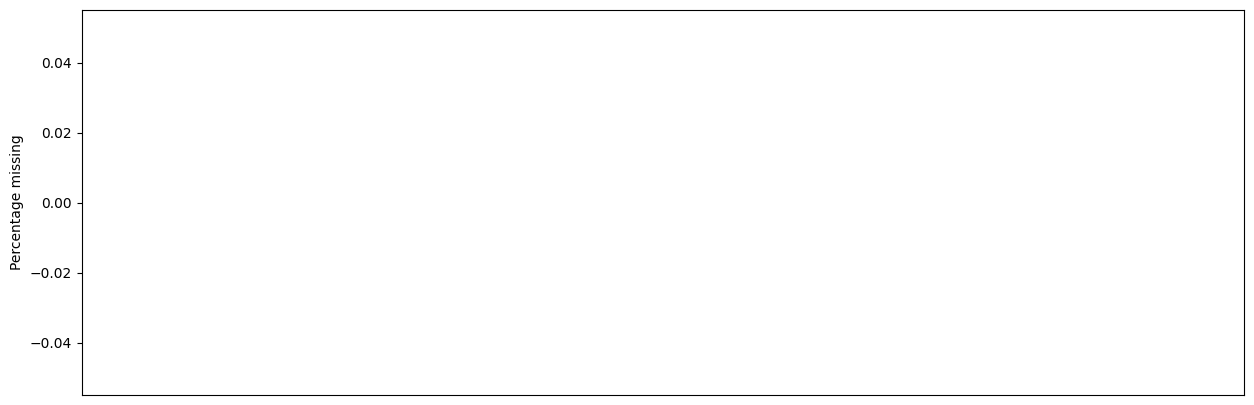

In [12]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

### Dropping Columns which has more than 70% of missing values.

In [13]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0


In [14]:
df.drop(list(dropcols.index), axis=1, inplace=True)

In [15]:
# Check shape of the dataset after dropping columns
df.shape

(88647, 112)

In [16]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 0.0%


## Visualization of unique values in Target variable

legitimate: 58000, phishing: 30647


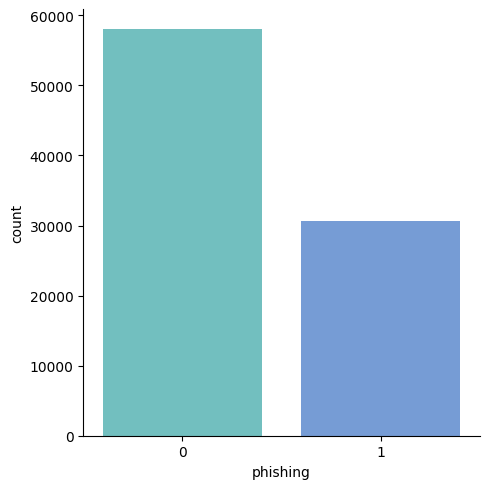

In [17]:
# legitimate class(value 0) or phishing class (value 1).
legitimate = df[df['phishing']==0].shape[0]
phishing = df[df['phishing']==1].shape[0]
print("legitimate: " + str(legitimate) + ", phishing: " + str(phishing))
sns.catplot(data=df, x="phishing", kind="count", palette="winter_r", alpha=.6)
plt.show()

**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the legitimate class (majority class) very large compared to that of the phishing class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

## Create Functions for model training and evaluation

In [18]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [19]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [20]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

### Plot  distribution of all Independent Numerical variables

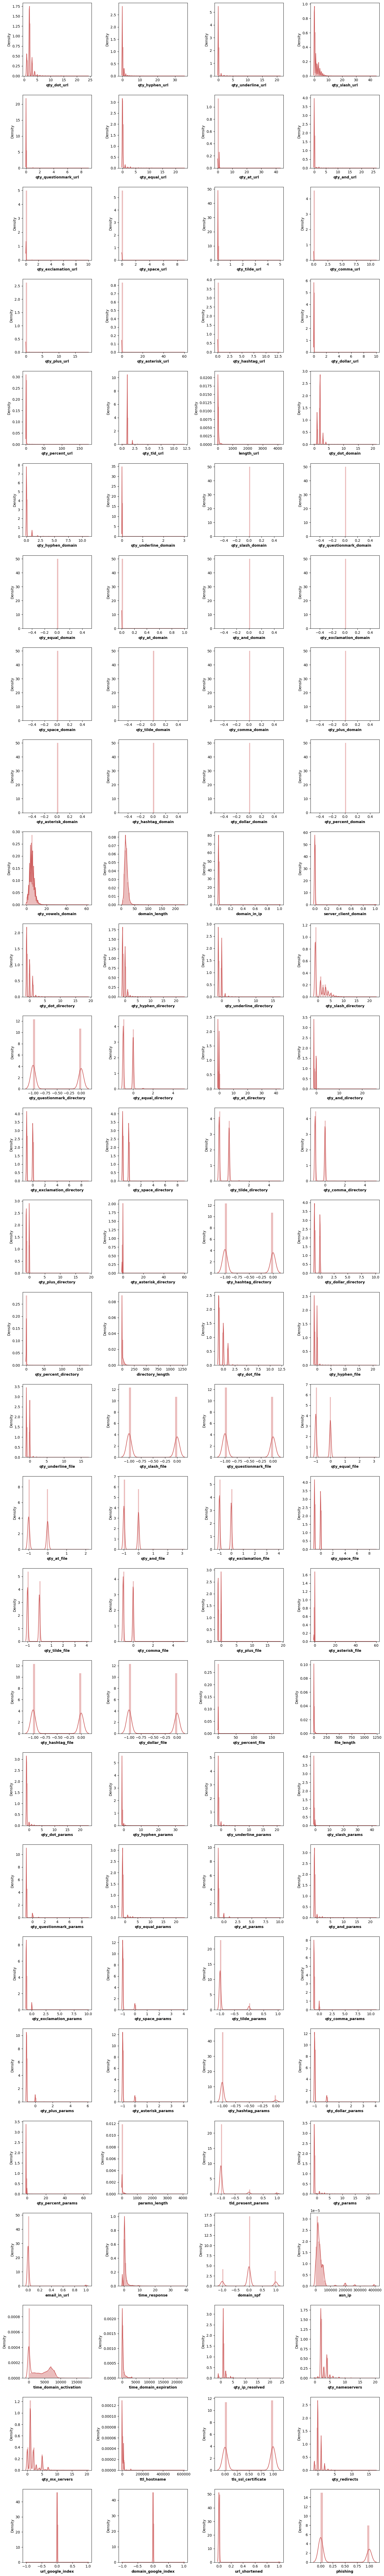

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(28, 4, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

**Report**
- As per the above plot most of the features are not normally distributed.
- Transformation of data is not of prime importance since it is a classification problem.
- Interpreting each and every column is not necessary as this is phishing data.

# Evaluate Model on Different experiments

In [21]:
# Splitting X and y for all Experiments
X = df.drop('phishing', axis=1)
y = df['phishing']

- **Manually Encoding Target Variable**

### Experiment: 1 = KNN Imputer for Null values

**Why Robust scaler and not Standard scaler?**
- Scaling the data using Robust scaler
- Since most of the independent variables are not normally distributed we cannot use Standardscaler

**Why Robust Scaler and not Minmax?** 
- because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [22]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

**Why KNN Imputer**?
- KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.
- KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.
- Here we Iterates through different K values and get accuracy and choose best K values.

**Finding the optimal n_neighbour value for KNN imputer**

In [23]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [50,100,150,200]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 50 || accuracy (0.9328)
n_neighbors= 100 || accuracy (0.9328)
n_neighbors= 150 || accuracy (0.9328)
n_neighbors= 200 || accuracy (0.9328)


**We can observe n_neighbors=200 able to produce highest accuracy**

### Pipeline for KNN imputer

In [24]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=200)),
    ('RobustScaler', RobustScaler())
])

In [25]:
X_knn =knn_pipeline.fit_transform(X)

## Handling Imbalanced data

 **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
 - This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class
 
 - To add new data of minority class
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - To remove the tomek links of the majority class
 1. Choose random data from the majority class.
 2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [26]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [27]:
X_res.shape, y_res.shape

((115414, 111), (115414,))

### Initialize Default Models in a dictionary

In [29]:
# Dictionary which contains models for experiment
models = {"Support Vector Classifier": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "AdaBoost Classifier": AdaBoostClassifier()
}

### Fit KNN imputed data for models in dictionary

In [30]:
report_knn = evaluate_models(X_res, y_res, models)

Support Vector Classifier
Model performance for Training set
- Accuracy: 0.9276
- F1 score: 0.9306
- Precision: 0.8948
- Recall: 0.9694
- Roc Auc Score: 0.9276
- COST: 759690.
----------------------------------
Model performance for Test set
- Accuracy: 0.9280
- F1 score: 0.9306
- Precision: 0.8940
- Recall: 0.9702
- Roc Auc Score: 0.9282
- COST: 184210.


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 1500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9782
- F1 score: 0.9782
- Precision: 0.9739
- Recall: 0.9825
- Roc Auc Score: 0.9782
- COST: 103520.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 1500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9646
- F1 score: 0.9644
- Precision: 0.9650
- Recall: 

### Report for KNN Imputed data

In [31]:
report_knn

,Model Name,Cost
1,Random Forest,103520
6,XGBClassifier,121390
5,K-Neighbors Classifier,141430
3,Gradient Boosting,181170
0,Support Vector Classifier,184210
2,Decision Tree,211520
7,AdaBoost Classifier,274650
4,Logistic Regression,290140


**Insights**
- For the Experiment 1: Knn imputer has Random Forest classifier as the best Model
- Proceeding with further experiments 

### Experiment: 2 = Simple Imputer with Strategy Median 

- SimpleImputer is a class in the `sklearn.impute` module that can be used to replace missing values in a dataset, using a variety of input strategies.
- Here we use SimpleImputer can also be used to impute multiple columns at once by passing in a list of column names. SimpleImputer will then replace missing values in all of the specified columns.

In [32]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [33]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

In [34]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [35]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Support Vector Classifier
Model performance for Training set
- Accuracy: 0.9276
- F1 score: 0.9306
- Precision: 0.8948
- Recall: 0.9694
- Roc Auc Score: 0.9276
- COST: 759690.
----------------------------------
Model performance for Test set
- Accuracy: 0.9280
- F1 score: 0.9306
- Precision: 0.8940
- Recall: 0.9702
- Roc Auc Score: 0.9282
- COST: 184210.


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 1010.
----------------------------------
Model performance for Test set
- Accuracy: 0.9786
- F1 score: 0.9786
- Precision: 0.9741
- Recall: 0.9830
- Roc Auc Score: 0.9786
- COST: 100500.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 1500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9648
- F1 score: 0.9646
- Precision: 0.9651
- Recall: 

## Report for Simple Imputer with median strategy

In [36]:
report_median

,Model Name,Cost
1,Random Forest,100500
6,XGBClassifier,121390
5,K-Neighbors Classifier,141430
3,Gradient Boosting,181170
0,Support Vector Classifier,184210
2,Decision Tree,210500
7,AdaBoost Classifier,274650
4,Logistic Regression,290140


**Insights**
- For the Experiment 2: Simple imputer with median strategy has Random Forest classifier as the best Model
- Proceeding with further experiments 

!pip install miceforest

In [37]:
!pip install miceforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00


### Experiment: 3 = MICE for Imputing Null values

- MICE stands for Multivariate Imputation By Chained Equations algorithm
- This technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.
- `ImputationKernel` Creates a kernel dataset. This dataset can perform MICE on itself, and impute new data from models obtained during MICE.

In [38]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice,
  save_all_iterations=True,
  random_state=1989
)# Run the MICE algorithm for 3 iterations kernel.mice(3)

In [39]:
X_mice = kernel.complete_data()

In [40]:
# fit robust scaler
mice_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

In [41]:
# Fit X with Mice imputer 
X_mice= mice_pipeline.fit_transform(X_mice)

In [42]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)

In [43]:
# Training the models
report_mice = evaluate_models(X_res, y_res, models)

Support Vector Classifier
Model performance for Training set
- Accuracy: 0.9276
- F1 score: 0.9306
- Precision: 0.8948
- Recall: 0.9694
- Roc Auc Score: 0.9276
- COST: 759690.
----------------------------------
Model performance for Test set
- Accuracy: 0.9280
- F1 score: 0.9306
- Precision: 0.8940
- Recall: 0.9702
- Roc Auc Score: 0.9282
- COST: 184210.


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 1510.
----------------------------------
Model performance for Test set
- Accuracy: 0.9781
- F1 score: 0.9781
- Precision: 0.9739
- Recall: 0.9822
- Roc Auc Score: 0.9781
- COST: 105020.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 1500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9646
- F1 score: 0.9644
- Precision: 0.9646
- Recall: 

## Report for MICE Imputer algorithm

In [44]:
report_mice

,Model Name,Cost
1,Random Forest,105020
6,XGBClassifier,121390
5,K-Neighbors Classifier,141430
3,Gradient Boosting,181170
0,Support Vector Classifier,184210
2,Decision Tree,209560
7,AdaBoost Classifier,274650
4,Logistic Regression,290140


**Insights**
- For the Experiment 3: Mice imputer has Random Forest classifier as the best Model
- Proceeding with further experiments 

### Experiment: 4 = Simple Imputer with Strategy Constant 

- Another strategy which can be used is replacing missing values with a fixed (constant) value.
- To do this, specify “constant” for strategy and specify the fill value using the fill_value parameter

In [45]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [46]:
X_const =constant_pipeline.fit_transform(X)

In [47]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [48]:
# training the models
report_const = evaluate_models(X_res, y_res, models)

Support Vector Classifier
Model performance for Training set
- Accuracy: 0.9276
- F1 score: 0.9306
- Precision: 0.8948
- Recall: 0.9694
- Roc Auc Score: 0.9276
- COST: 759690.
----------------------------------
Model performance for Test set
- Accuracy: 0.9280
- F1 score: 0.9306
- Precision: 0.8940
- Recall: 0.9702
- Roc Auc Score: 0.9282
- COST: 184210.


Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 0.9999
- COST: 2500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9779
- F1 score: 0.9779
- Precision: 0.9733
- Recall: 0.9826
- Roc Auc Score: 0.9779
- COST: 103100.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 1500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9652
- F1 score: 0.9651
- Precision: 0.9649
- Recall: 

## Report for Simple Imputer with Constant strategy

In [49]:
report_const

,Model Name,Cost
1,Random Forest,103100
6,XGBClassifier,121390
5,K-Neighbors Classifier,141430
3,Gradient Boosting,181170
0,Support Vector Classifier,184210
2,Decision Tree,204030
7,AdaBoost Classifier,274650
4,Logistic Regression,290140


**Insights**
- For the Experiment 4: Simple imputer with constant strategy has XGBoost classifier as the best Model
- Proceeding with further experiments 

## Experiment: 5 = Simple Imputer with Strategy Mean 

- Another strategy which can be used is replacing missing values with mean
- Here we replace the missing values with the mean of the column

In [50]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [51]:
X_mean = mean_pipeline.fit_transform(X)

In [52]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [53]:
# Training all models
report_mean = evaluate_models(X_res, y_res, models)

Support Vector Classifier
Model performance for Training set
- Accuracy: 0.9276
- F1 score: 0.9306
- Precision: 0.8948
- Recall: 0.9694
- Roc Auc Score: 0.9276
- COST: 759690.
----------------------------------
Model performance for Test set
- Accuracy: 0.9280
- F1 score: 0.9306
- Precision: 0.8940
- Recall: 0.9702
- Roc Auc Score: 0.9282
- COST: 184210.


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 1010.
----------------------------------
Model performance for Test set
- Accuracy: 0.9781
- F1 score: 0.9781
- Precision: 0.9742
- Recall: 0.9820
- Roc Auc Score: 0.9781
- COST: 106490.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000
- COST: 1500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9649
- F1 score: 0.9647
- Precision: 0.9656
- Recall: 

### Report for Simple imputer with strategy mean

In [54]:
report_mean

,Model Name,Cost
1,Random Forest,106490
6,XGBClassifier,121390
5,K-Neighbors Classifier,141430
3,Gradient Boosting,181170
0,Support Vector Classifier,184210
2,Decision Tree,211950
7,AdaBoost Classifier,274650
4,Logistic Regression,290140


## Final Model

In [62]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["Random Forest Classifier","Median","100500"])
pt.add_row(["Random Forest Classifier","Simple Imputer-Constant","103100"])
pt.add_row(["Random Forest Classifier","Knn-Imputer","103520"])
pt.add_row(["Random Forest Classifier","Mice","105020"])
pt.add_row(["Random Forest Classifier","Simple Imputer-Mean","106490"])
print(pt)

+--------------------------+-------------------------+------------+
|          Model           |    Imputation_method    | Total_cost |
+--------------------------+-------------------------+------------+
| Random Forest Classifier |          Median         |   100500   |
| Random Forest Classifier | Simple Imputer-Constant |   103100   |
| Random Forest Classifier |       Knn-Imputer       |   103520   |
| Random Forest Classifier |           Mice          |   105020   |
| Random Forest Classifier |   Simple Imputer-Mean   |   106490   |
+--------------------------+-------------------------+------------+


**Report**
- From the final report we can see than Random Forest Classifier with Simple imputer with strategy constant has performed the best with cost of 103100

### Fitting the Final model and get reports

In [55]:
final_model = RandomForestClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [57]:
print("Final Random Forest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random Forest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final Random Forest Classifier Accuracy Score (Train) : 0.9999675082041785
Final Random Forest Classifier Accuracy Score (Test) : 0.9780357839102369


In [58]:
print("Final Random Forest Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final Random Forest Classifier Cost Metric(Test) : 103560


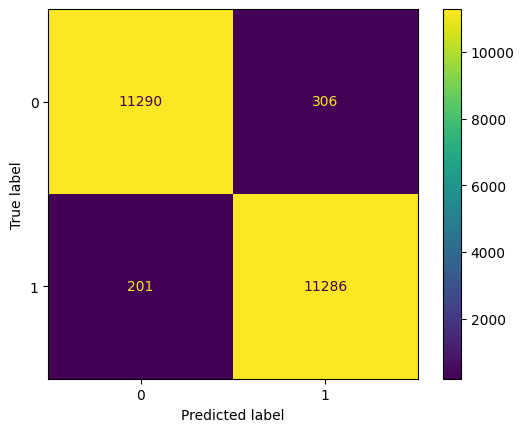

In [59]:
#ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.show()

## The best Model is Random Forest Classifier with 97.8% accuracy and cost of 104950

In [60]:
final_model = SVC()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Final Random Forest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random Forest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

print("Final Random Forest Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))


Final Random Forest Classifier Accuracy Score (Train) : 0.9276191095081825
Final Random Forest Classifier Accuracy Score (Test) : 0.9279556383485682
Final Random Forest Classifier Cost Metric(Test) : 184210


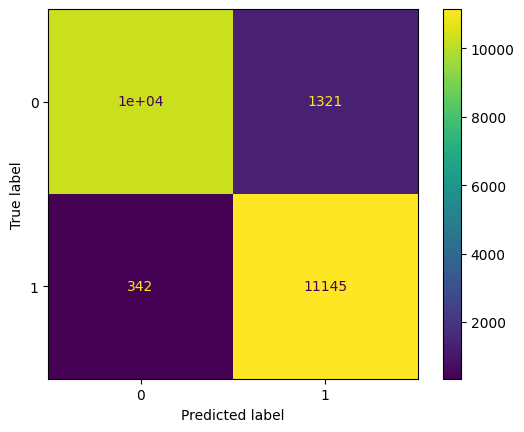

In [61]:
#ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.show()